In [1]:
import pandas as pd
import numpy as np

In [2]:
datafile = pd.read_csv('cardiocleaned.csv')   #reading the cleaned dataset

label = datafile['cardio'].values   #  y_ y is separated in a list called as label
data = datafile.drop(['cardio'], axis = 1)    #input x is separated in form of Dataframe called as data 
datafile

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,male,168,62.0,110,80,chl_avg,glc_avg,0,0,1,0
1,20228,female,156,85.0,140,90,chl_high,glc_avg,0,0,1,1
2,18857,female,165,64.0,130,70,chl_high,glc_avg,0,0,0,1
3,17623,male,169,82.0,150,100,chl_avg,glc_avg,0,0,1,1
4,17474,female,156,56.0,100,60,chl_avg,glc_avg,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
67741,19240,male,168,76.0,120,80,chl_avg,glc_avg,1,0,1,0
67742,22601,female,158,126.0,140,90,chl_aboveavg,glc_aboveavg,0,0,1,1
67743,19066,male,183,105.0,180,90,chl_high,glc_avg,0,1,0,1
67744,22431,female,163,72.0,135,80,chl_avg,glc_aboveavg,0,0,0,1


In [3]:
# split data into training, validation, testing data
from sklearn.model_selection import train_test_split   #class to split data

x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, stratify = label)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(54196, 11) (13550, 11) (54196,) (13550,)


In [4]:
#scaling age (in days) , scaling height (in cm), weight (in kg), ap_hi, ap_lo (Numerical data) using Min-Max Scaler

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()      #reshape(-1,1) convert sparse csr matrix into numpy array

scale.fit(x_train['age'].values.reshape(-1,1)) 
x_train_age = scale.transform(x_train[['age']])  
x_test_age = scale.transform(x_test['age'].values.reshape(-1,1))

scale.fit(x_train['height'].values.reshape(-1,1)) 
x_train_height = scale.transform(x_train['height'].values.reshape(-1,1))  
x_test_height = scale.transform(x_test['height'].values.reshape(-1,1))

scale.fit(x_train['weight'].values.reshape(-1,1)) 
x_train_weight = scale.transform(x_train['weight'].values.reshape(-1,1))  
x_test_weight = scale.transform(x_test['weight'].values.reshape(-1,1))

scale.fit(x_train['ap_hi'].values.reshape(-1,1)) 
x_train_ap_hi = scale.transform(x_train['ap_hi'].values.reshape(-1,1))  
x_test_ap_hi = scale.transform(x_test['ap_hi'].values.reshape(-1,1))

scale.fit(x_train['ap_lo'].values.reshape(-1,1)) 
x_train_ap_lo = scale.transform(x_train['ap_lo'].values.reshape(-1,1))  
x_test_ap_lo = scale.transform(x_test['ap_lo'].values.reshape(-1,1))

print(type(x_train_age), x_train_age.shape, type(x_test_age), x_test_age.shape)

<class 'numpy.ndarray'> (54196, 1) <class 'numpy.ndarray'> (13550, 1)


/home/komal/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [5]:
# convert gender, cholesterol, glucose (categorical data) into One Hot Encoding

from sklearn.feature_extraction.text import CountVectorizer  

vec = CountVectorizer()

vec.fit(x_train['gender'].values)
x_train_gender = vec.transform(x_train['gender'].values)  
x_test_gender = vec.transform(x_test['gender'].values)

vec.fit(x_train['cholesterol'].values)
x_train_cholesterol = vec.transform(x_train['cholesterol'].values)  
x_test_cholesterol = vec.transform(x_test['cholesterol'].values)

vec.fit(x_train['gluc'].values)
x_train_gluc = vec.transform(x_train['gluc'].values)  
x_test_gluc = vec.transform(x_test['gluc'].values)

print(type(x_train_gender), x_train_gender.shape, type(x_test_gender), x_test_gender.shape)

<class 'scipy.sparse._csr.csr_matrix'> (54196, 2) <class 'scipy.sparse._csr.csr_matrix'> (13550, 2)


In [6]:
# smoke, alco, active, binary only 0/1 (Yes/No) hence no need to convert into One Hot Encoding or min max scaling

#just taking separately and converting sparse csr matrix form in np array form

x_train_smoke = x_train['smoke'].values.reshape(-1,1)
x_test_smoke = x_test['smoke'].values.reshape(-1,1)

x_train_alco = x_train['alco'].values.reshape(-1,1)
x_test_alco = x_test['alco'].values.reshape(-1,1)

x_train_active = x_train['active'].values.reshape(-1,1)
x_test_active = x_test['active'].values.reshape(-1,1)

In [7]:
# stack arrays horizontally

from scipy.sparse import hstack

x_train_processed = hstack((x_train_age, x_train_gender, x_train_height, x_train_weight, x_train_ap_hi, x_train_ap_lo, x_train_cholesterol, x_train_gluc, x_train_smoke, x_train_alco, x_train_active))
x_test_processed = hstack((x_test_age, x_test_gender, x_test_height, x_test_weight, x_test_ap_hi, x_test_ap_lo, x_test_cholesterol, x_test_gluc, x_test_smoke, x_test_alco, x_test_active))

print("x_train_processed and x_test_processed type: ",type(x_train_processed), type(x_test_processed), "\n")

x_train_processed = x_train_processed.toarray()
x_test_processed = x_test_processed.toarray()

print("x_train_processed and x_test_processed type: ",type(x_train_processed), type(x_test_processed))
print("x_train_processed and x_test_processed shape: ",x_train_processed.shape, x_test_processed.shape)

print(f"\nSome random row of x_train_processed for checking:\n{x_train_processed[38180]}")

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train and y_test type: ",type(y_train), type(y_test))
print("y_train and y_test shape: ",y_train.shape, y_test.shape)

x_train_processed and x_test_processed type:  <class 'scipy.sparse._coo.coo_matrix'> <class 'scipy.sparse._coo.coo_matrix'> 

x_train_processed and x_test_processed type:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
x_train_processed and x_test_processed shape:  (54196, 16) (13550, 16)

Some random row of x_train_processed for checking:
[0.92024777 1.         0.         0.32307692 0.05333333 0.38888889
 0.35714286 0.         1.         0.         0.         1.
 0.         0.         0.         0.        ]
y_train and y_test type:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
y_train and y_test shape:  (54196, 1) (13550, 1)


In [31]:
### K Nearest Neighbor

In [32]:
# Packages required

import math
from sklearn import model_selection
from sklearn.model_selection  import GridSearchCV
from sklearn. import   #it doesn't take count into consideration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Predicted output on Testing Data: [0 0 0 ... 0 0 0]
Confusion Matrix :
[[5284 1517]
 [3093 3656]]


/home/komal/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


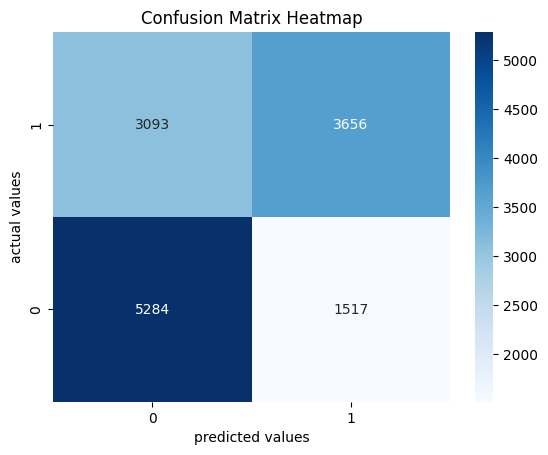

accuracy score :
0.6597785977859778


In [33]:

naive_m1 = GaussianNB()

# Fitting the Model M1 on training data
naive_bayes_m1.fit(x_train_processed, y_train)

#predicting output (class) on testing data
y_test_pred = naive_bayes_m1.predict(x_test_processed)   
print(f"Predicted output on Testing Data: {y_test_pred}")

# Plotting confusion matrix (FPR, TPR, FNR, TNR)

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns     #for heatmap

### Confusion matrix
confusionmatrix = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix :\n{confusionmatrix}") 
# Actuacl -> Vertical (0,1), Predicted -> Horizontal (0,1)

#Visualizing confusion matrix using  Heat-map (Seaborn library's function)
ax= sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap='Blues')
ax.set_ylim([0,2])
#Customize the plot with additional settings from Matplotlib
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Confusion Matrix Heatmap')
plt.show()

# annot=True: Adds numerical annotations to each cell in the heatmap for better readability.
# fmt='d': Specifies that the annotations should be formatted as integers.
# cmap='Blues': Specifies the color map to use for the heatmap, in this case, shades of blue.

### Accuracy Score
accuracyscore = accuracy_score(y_test, y_test_pred)
print(f"accuracy score :\n{accuracyscore}")